## Wine Quality Prediction




### By- Pratik Santosh Akole



### for Statsly Analytics

# Import Necessary Modules

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [71]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### How many rows and columns are there?

In [72]:
rows = df.shape[0]
cols = df.shape[1]

print("There are " + str(rows) + " rows and " + str(cols) + " columns in this dataframe.")

There are 1599 rows and 12 columns in this dataframe.


In [73]:
# Basic Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
# statistics for each columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* Ph value varies from 2.7 to 4.0
* residual Sugar varies from 0.90 to 15.5
* free sulfur dioxide varies from 1 to 72
* value of alcohol varies from 8.4 to 14.9

#### Are there null values in the dataframe?

In [75]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- There are no null values in the dataset.

In [76]:
dupRows= df.duplicated().sum()
print("There are " + str(dupRows) + " duplicated rows in the dataframe. They will be removed.")

There are 240 duplicated rows in the dataframe. They will be removed.


In [77]:
# Removing duplicated rows
df.drop_duplicates(keep='first',inplace=True)

In [78]:
dupRows= df.duplicated().sum()
print("There are " + str(dupRows) + " duplicated rows in the dataframe.")

There are 0 duplicated rows in the dataframe.


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


### Data Visualization

## Univariate

In [80]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

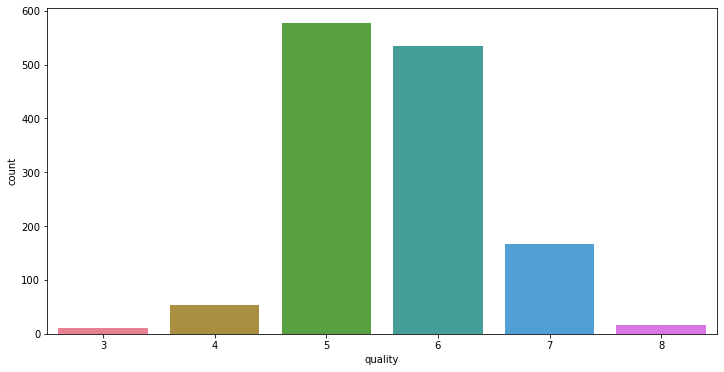

In [81]:
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=df, palette='husl');

#### Helper function to bin the target variable
- Binning the quality column into 0 and 1

In [82]:
def helper(row):
    if row.quality < 5.6:
        return 0
    else:
        return 1
df['quality']= df.apply(helper, axis=1)

In [83]:
df.quality.value_counts()

1    719
0    640
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

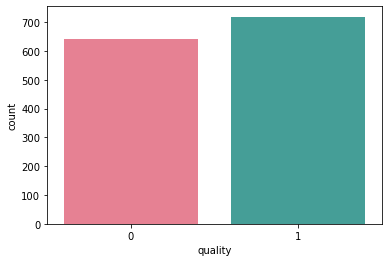

In [84]:
# quality Distribution
sns.countplot(x="quality", data=df, palette='husl')

<AxesSubplot:ylabel='quality'>

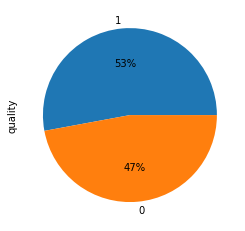

In [85]:
df['quality'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

- 53% of is the best quality wine while 47% is low quality wine.


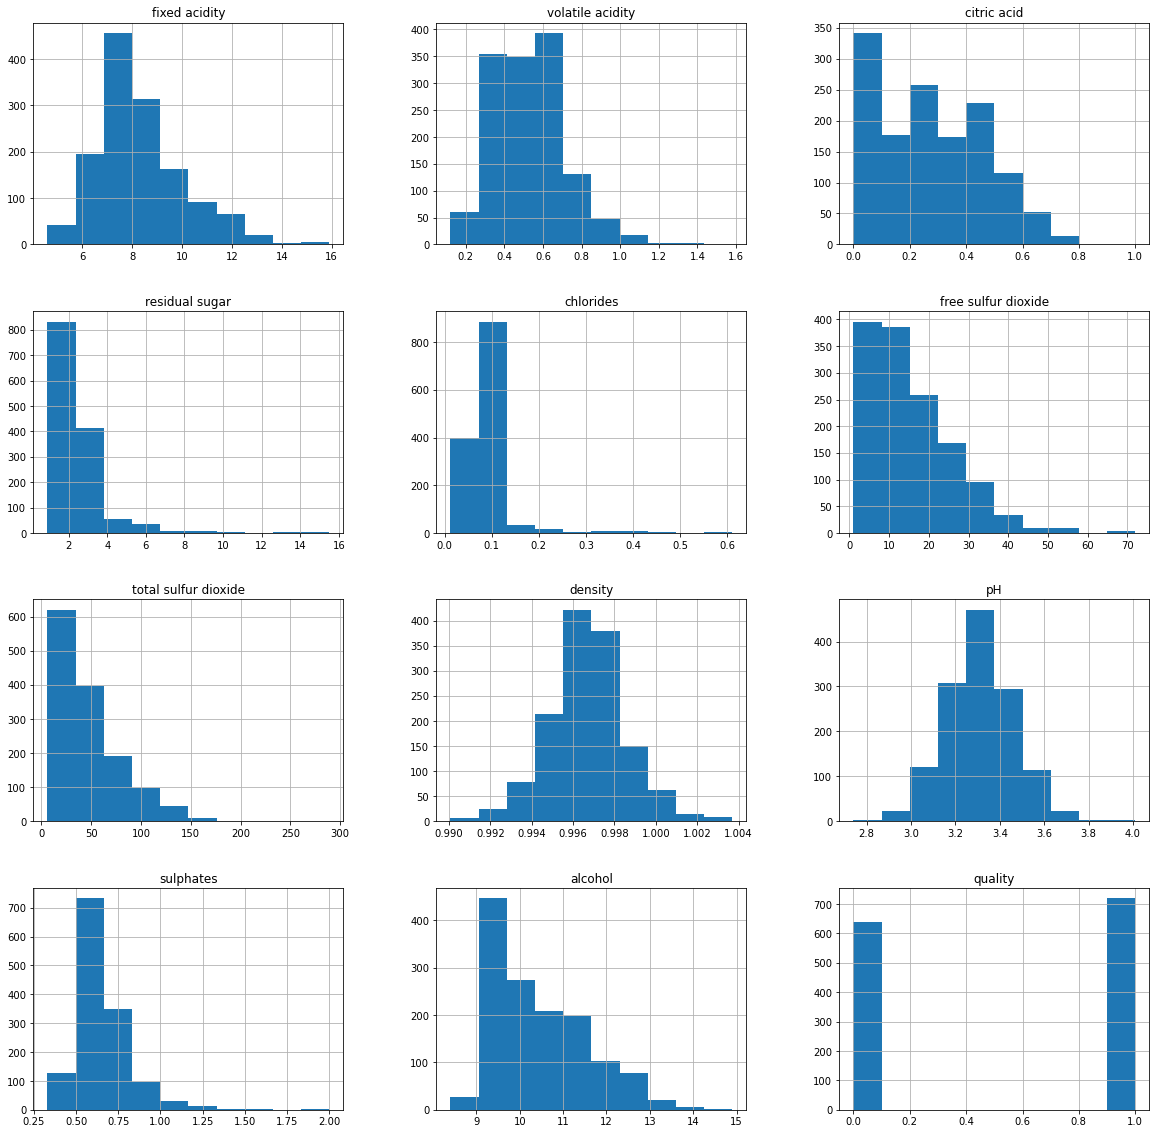

In [86]:
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

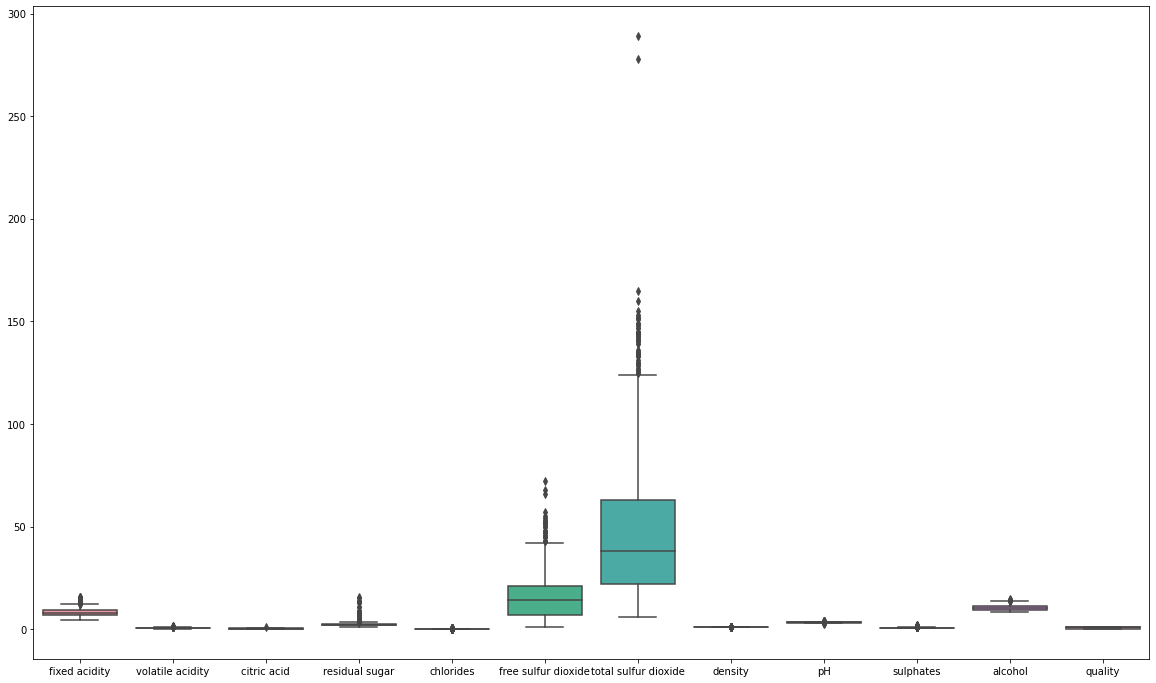

In [87]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df)

In [88]:
q1=df['total sulfur dioxide'].quantile(0.25)
q2=df['total sulfur dioxide'].quantile(0.75)
IQR=q2-q1

In [89]:
df=df[~((df<(q1-1.5*IQR))|(df>(q2+1.5*IQR))).any(axis=1)]

In [90]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


<AxesSubplot:>

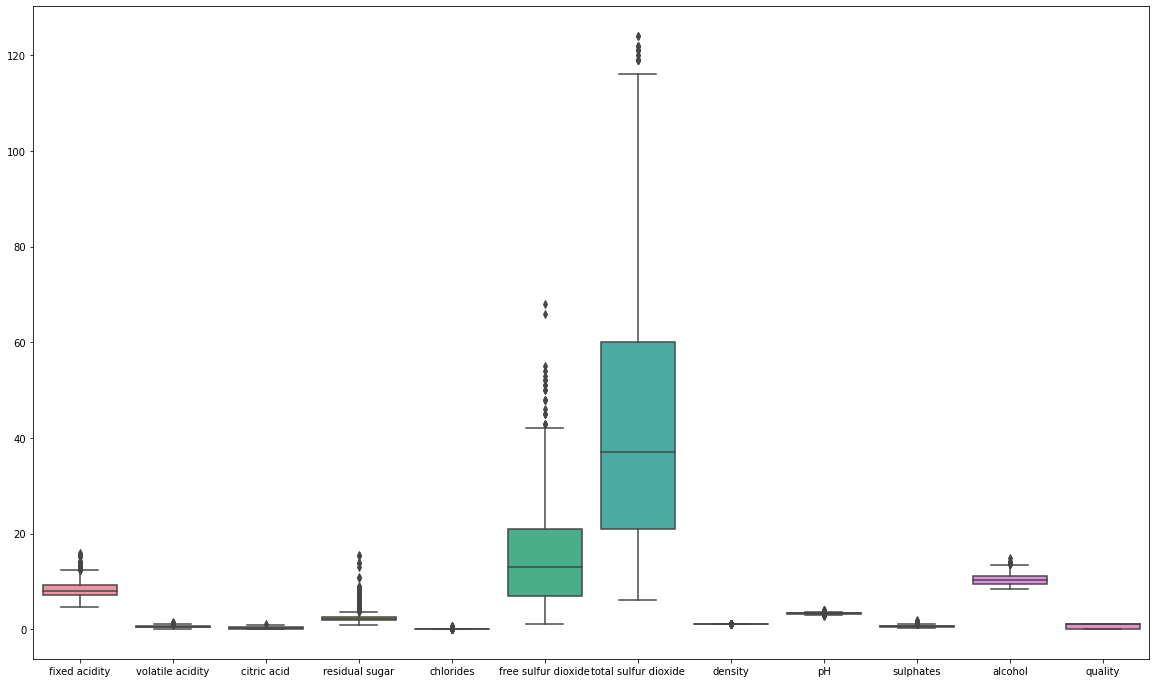

In [91]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df)

## Bivariate

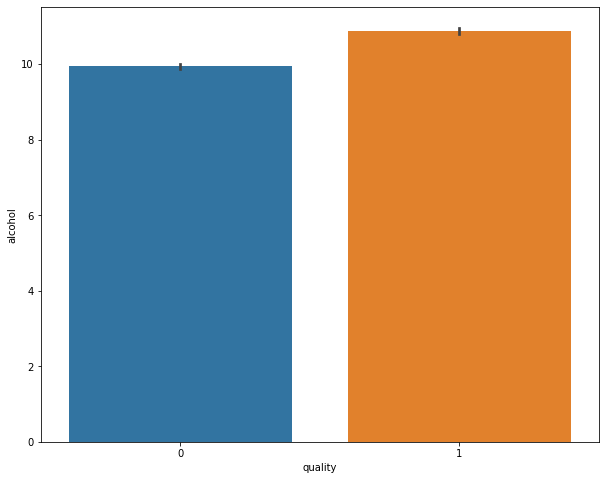

In [92]:
figure = plt.figure(figsize=(10,8))
sns.barplot(y="alcohol",x="quality",data=df)
plt.show()

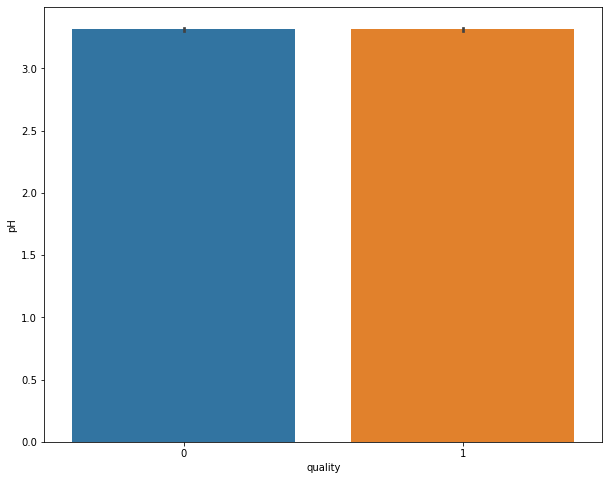

In [93]:
figure = plt.figure(figsize=(10,8))
sns.barplot(y="pH",x="quality",data=df)
plt.show()

- pH is present in equal amount in both quality i.e. good and bad (0 & 1)

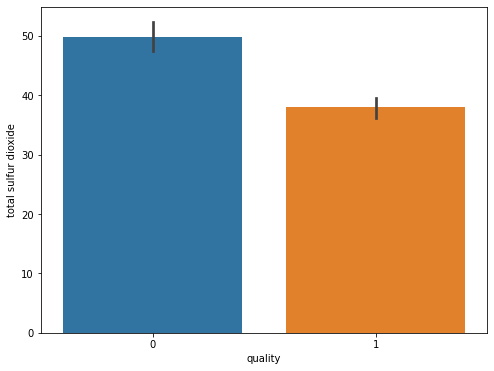

In [94]:
figure = plt.figure(figsize=(8,6))
sns.barplot(y="total sulfur dioxide",x="quality",data=df)
plt.show()

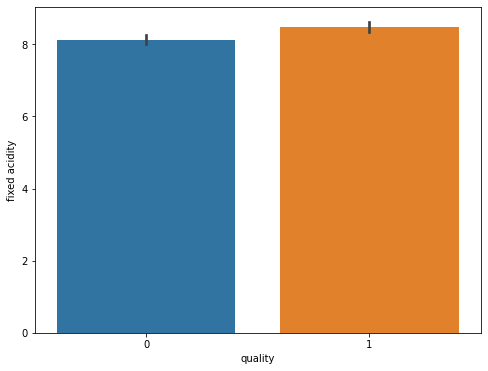

In [95]:
figure = plt.figure(figsize=(8,6))
sns.barplot(y="fixed acidity",x="quality",data=df)
plt.show()

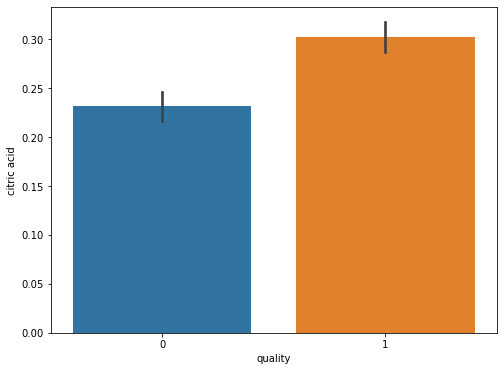

In [96]:
figure = plt.figure(figsize=(8,6))
sns.barplot(y="citric acid",x="quality",data=df)
plt.show()

- The quantity of citric acid is more in the quality 1.

## Multivariate

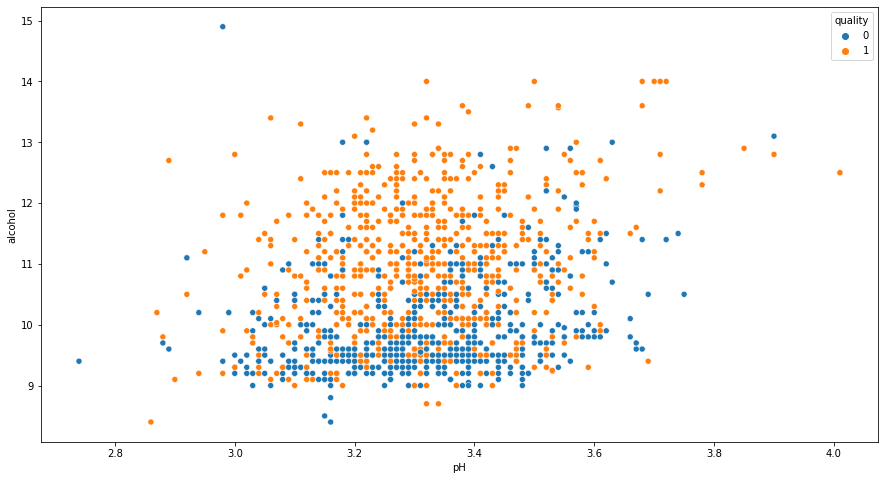

In [97]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="pH",y="alcohol",hue="quality",data=df)
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='pH'>

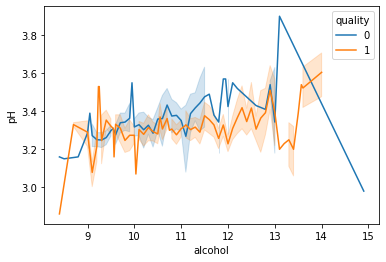

In [98]:
sns.lineplot(hue='quality',x='alcohol',y='pH',data=df)

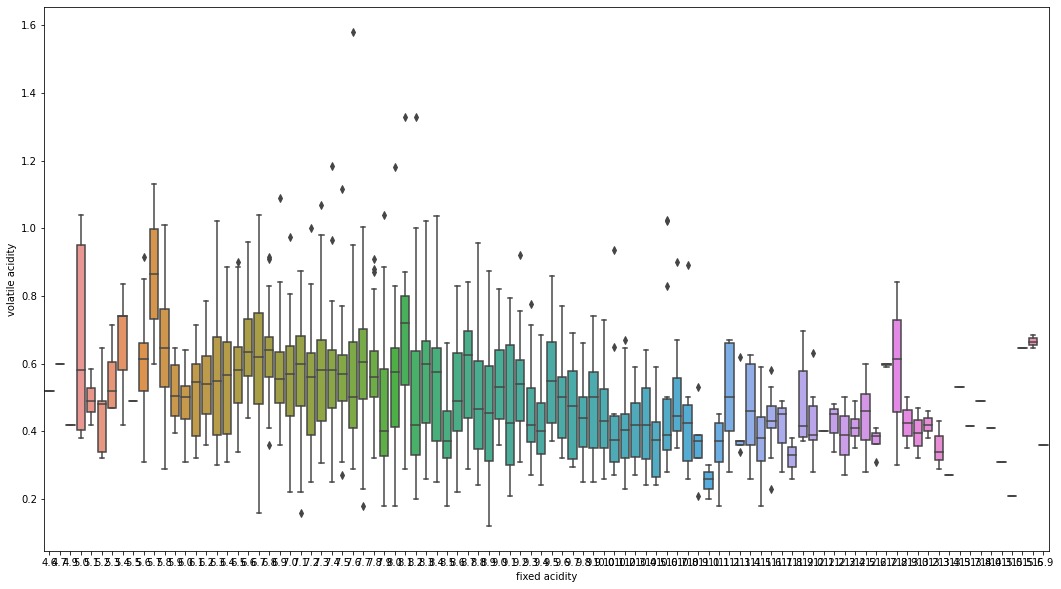

In [99]:
figure = plt.figure(figsize=(18,10))
sns.boxplot(y="volatile acidity",x="fixed acidity",data=df)
plt.show()


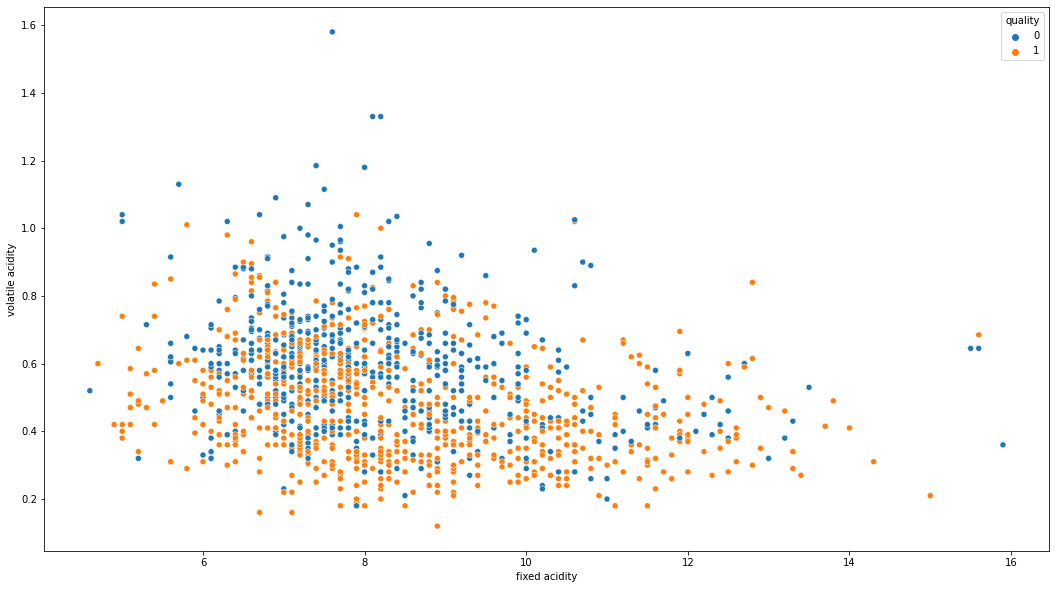

In [100]:
figure = plt.figure(figsize=(18,10))
sns.scatterplot(y="volatile acidity",x="fixed acidity",hue='quality',data=df)
plt.show()


Text(0.5, 1.0, 'Distribution Plot of Alcohol with Quality')

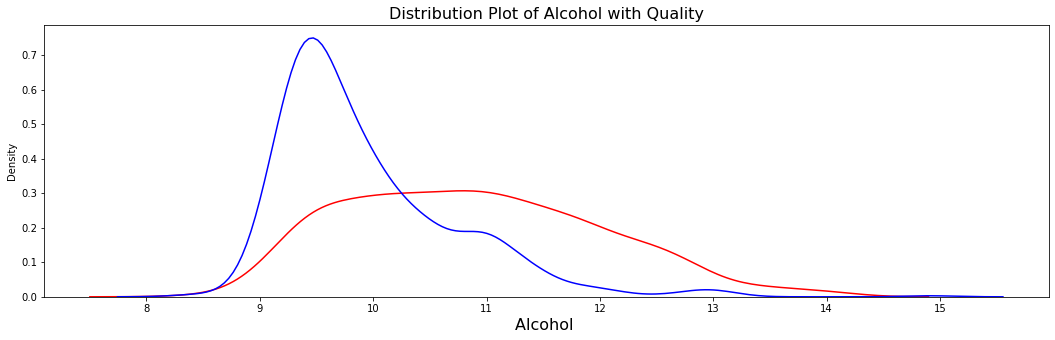

In [101]:
plt.figure(figsize=(18,5))

sns.distplot(df['alcohol'][df['quality']==1],hist=False,color='red')

sns.distplot(df['alcohol'][df['quality']==0],hist=False,color='blue')

plt.xlabel('Alcohol ', fontsize = 16)
plt.title('Distribution Plot of Alcohol with Quality', fontsize = 16)

Text(0.5, 1.0, 'Distribution Plot of Alcohol with Quality')

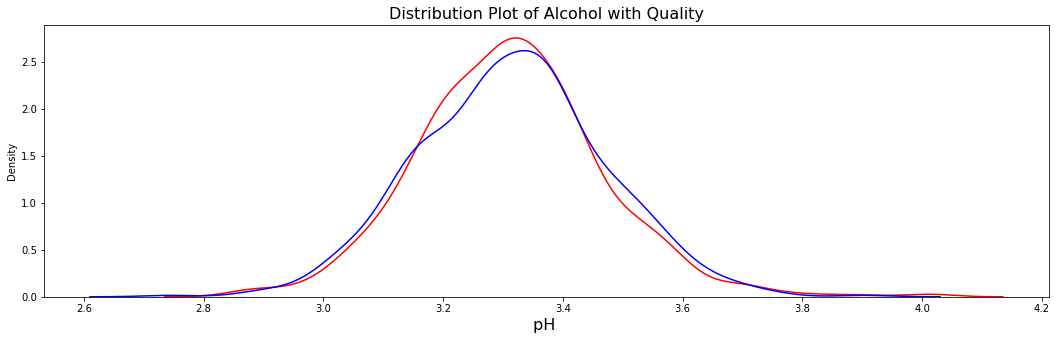

In [102]:
plt.figure(figsize=(18,5))

sns.distplot(df['pH'][df['quality']==1],hist=False,color='red')

sns.distplot(df['pH'][df['quality']==0],hist=False,color='blue')

plt.xlabel('pH ', fontsize = 16)
plt.title('Distribution Plot of Alcohol with Quality', fontsize = 16)

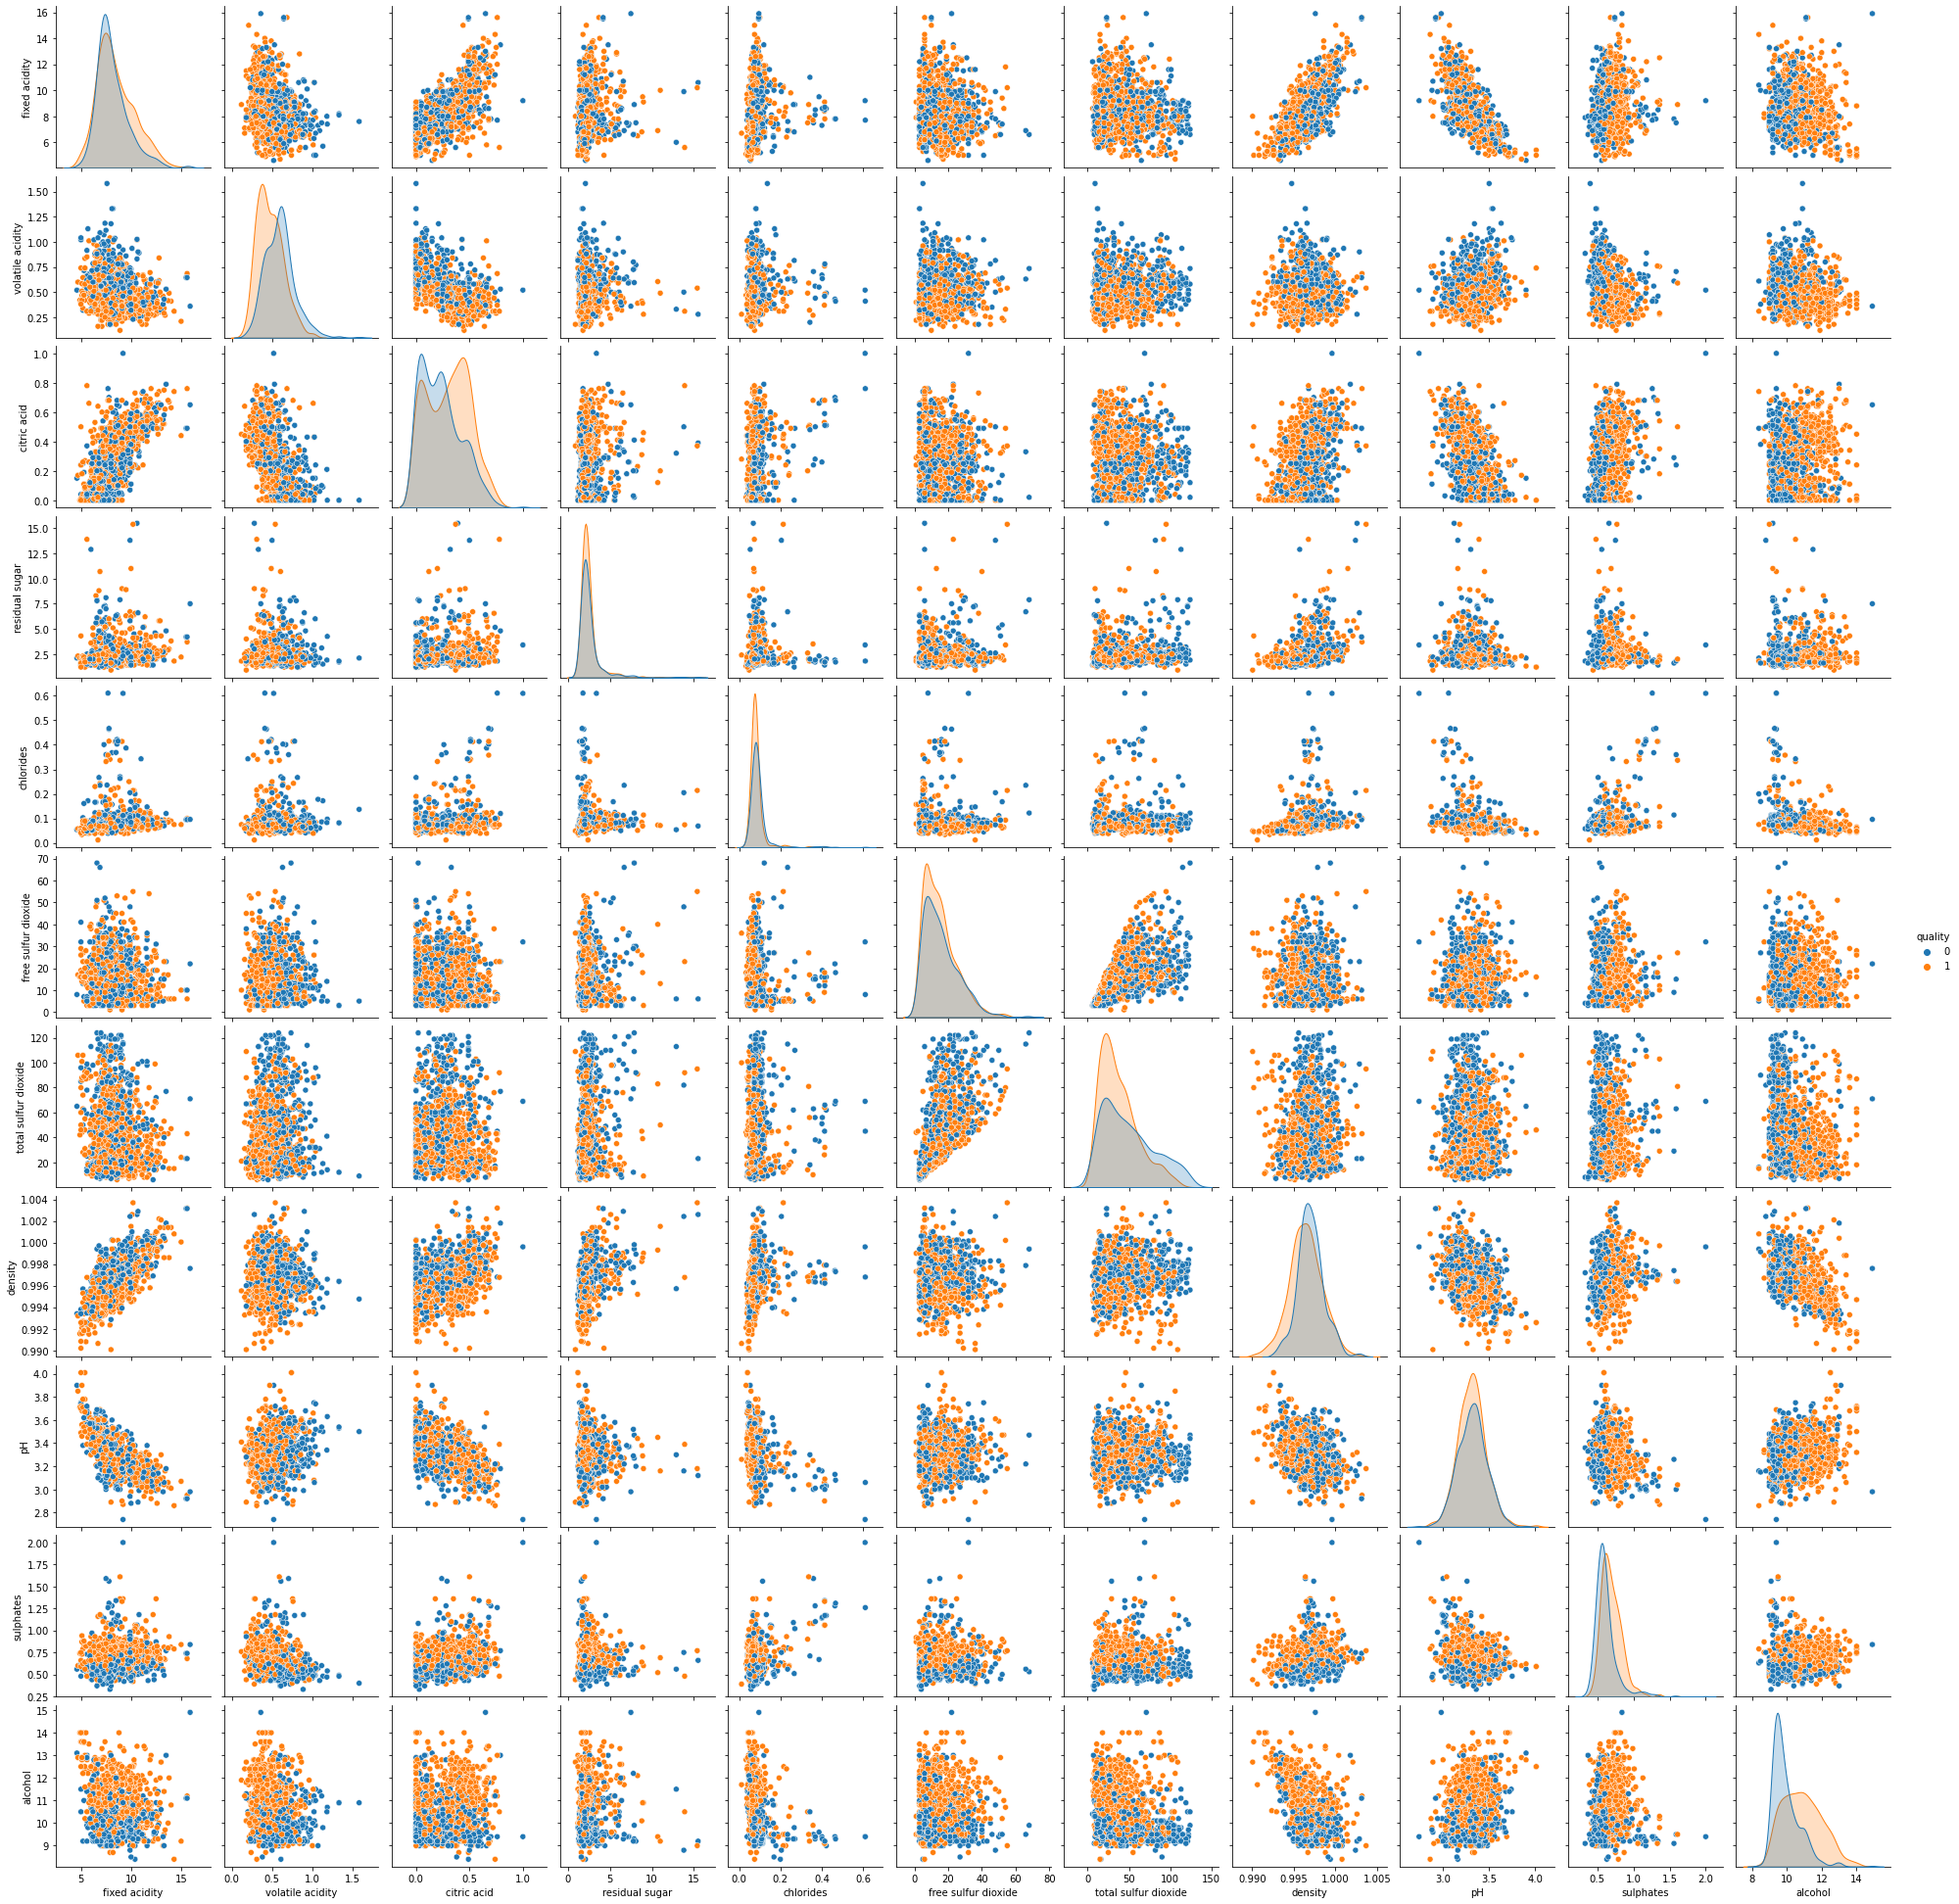

In [103]:
sns.pairplot(data=df, hue='quality')

## Skewness

In [104]:
from scipy.stats import skew

fixed acidity
0.9395969838671747


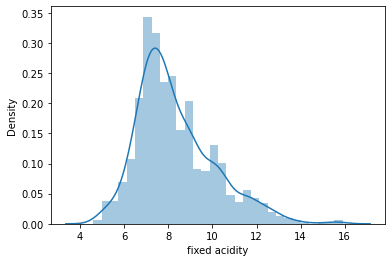

volatile acidity
0.7191939256515785


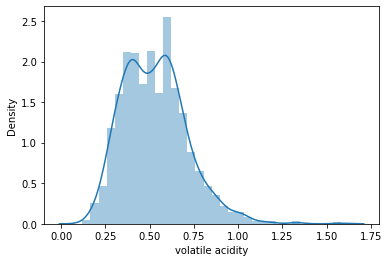

citric acid
0.3241992638879472


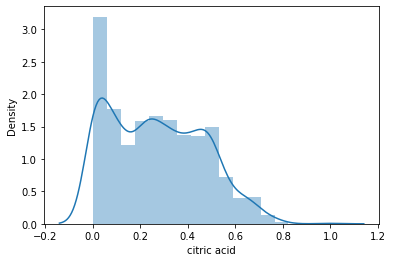

residual sugar
4.693131193956786


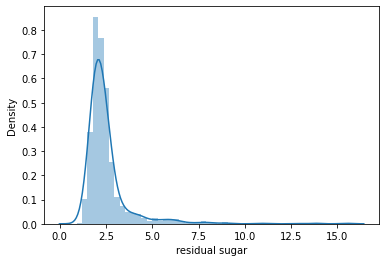

chlorides
5.475523235589629


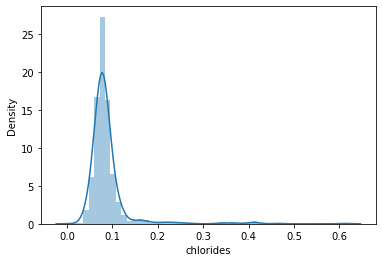

free sulfur dioxide
1.2149260016152161


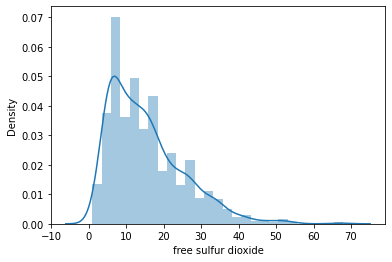

total sulfur dioxide
0.911521121638082


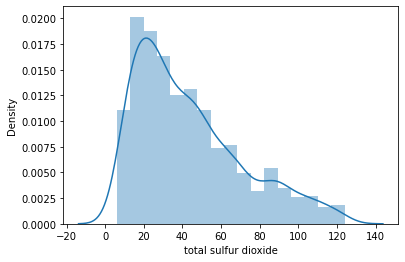

density
0.07311206714675507


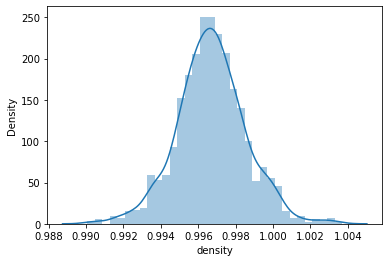

pH
0.2328205865630539


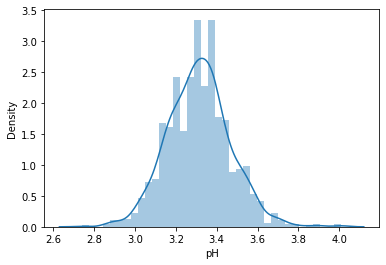

sulphates
1.983883498357278


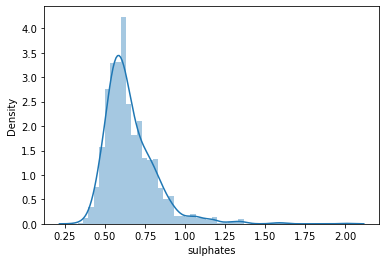

alcohol
0.8371568159350832


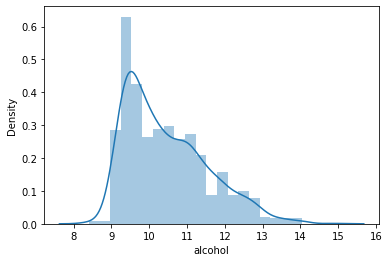

quality
-0.16801747072617873


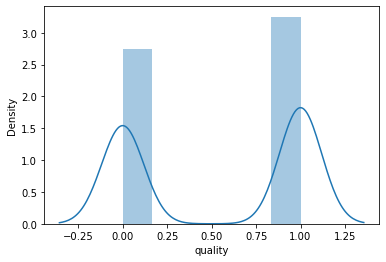

In [105]:
for col in df:
    print(col)
    print(skew( df[col] ))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

<AxesSubplot:>

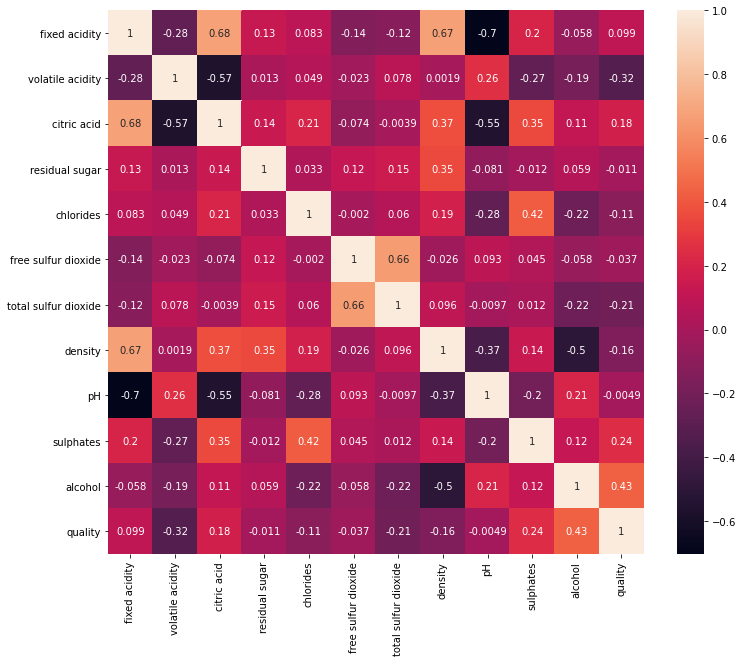

In [106]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [107]:
df["fixed acidity"] =np.sqrt(df["fixed acidity"])

In [108]:
df["residual sugar"] =np.sqrt(df["residual sugar"])


In [109]:
df["chlorides"] =np.sqrt(df["chlorides"])


In [110]:
df["free sulfur dioxide"] =np.sqrt(df["free sulfur dioxide"])


In [111]:
df["pH"] =np.sqrt(df["pH"])

In [112]:
skew(df["fixed acidity"])

0.6456575537271387

In [113]:
skew(df["residual sugar"])

2.9381193504866663

In [114]:
skew(df["chlorides"])


3.6868707549521753

In [115]:
skew(df["free sulfur dioxide"])


0.48174421605950596

In [116]:
skew(df["pH"])

0.13649446373479338

# Preprocessing

In [117]:
x= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [118]:
x

array([[ 2.7202941 ,  0.7       ,  0.        , ...,  1.8734994 ,
         0.56      ,  9.4       ],
       [ 2.79284801,  0.88      ,  0.        , ...,  1.78885438,
         0.68      ,  9.8       ],
       [ 2.79284801,  0.76      ,  0.04      , ...,  1.80554701,
         0.65      ,  9.8       ],
       ...,
       [ 2.42899156,  0.55      ,  0.1       , ...,  1.8761663 ,
         0.76      , 11.2       ],
       [ 2.42899156,  0.645     ,  0.12      , ...,  1.88944436,
         0.71      , 10.2       ],
       [ 2.44948974,  0.31      ,  0.47      , ...,  1.84119526,
         0.66      , 11.        ]])

In [119]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [120]:
# seperate the data.
from sklearn.model_selection import train_test_split

### Scalling

In [121]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30, random_state=42)

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# model training

-Let's start defining classification models
  Models which are implemented:

-Logitic Regression
-k-Nearest Neighbors
-Support Vector Classifier

In [123]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = logreg.predict(xtrain)
test_pred =  logreg.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.7334058759521219
Test Accuracy:  0.7367088607594937


In [124]:
ypred = logreg.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       169
           1       0.80      0.72      0.76       226

    accuracy                           0.74       395
   macro avg       0.74      0.74      0.73       395
weighted avg       0.74      0.74      0.74       395

[[129  40]
 [ 64 162]]


In [125]:
KNN = KNeighborsClassifier()
KNN.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = KNN.predict(xtrain)
test_pred =  KNN.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.8171926006528836
Test Accuracy:  0.6911392405063291


In [126]:
ypred = KNN.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.64      0.63      0.64       169
           1       0.73      0.73      0.73       226

    accuracy                           0.69       395
   macro avg       0.68      0.68      0.68       395
weighted avg       0.69      0.69      0.69       395

[[107  62]
 [ 60 166]]


In [127]:
svm = SVC()
svm.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = svm.predict(xtrain)
test_pred =  svm.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.7965179542981502
Test Accuracy:  0.7316455696202532


In [128]:
ypred = svm.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.67      0.75      0.70       169
           1       0.79      0.72      0.75       226

    accuracy                           0.73       395
   macro avg       0.73      0.73      0.73       395
weighted avg       0.74      0.73      0.73       395

[[126  43]
 [ 63 163]]


# Hyperameter Tunning

In [129]:
logreg = LogisticRegression(solver='liblinear',C=100)
logreg.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = logreg.predict(xtrain)
test_pred =  logreg.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.7334058759521219
Test Accuracy:  0.739240506329114


In [130]:
ypred = logreg.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       169
           1       0.80      0.72      0.76       226

    accuracy                           0.74       395
   macro avg       0.74      0.74      0.74       395
weighted avg       0.75      0.74      0.74       395

[[129  40]
 [ 63 163]]


In [131]:
accuracy=[]
for i in range (1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

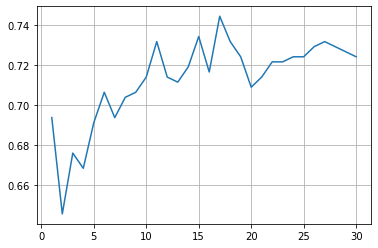

In [132]:
plt.plot(range(1,31), accuracy)
plt.grid(True)
plt.show()

In [133]:
KNN = KNeighborsClassifier(n_neighbors=17)
KNN.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = KNN.predict(xtrain)
test_pred =  KNN.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.7671381936887922
Test Accuracy:  0.7443037974683544


In [134]:
ypred = KNN.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       169
           1       0.78      0.77      0.78       226

    accuracy                           0.74       395
   macro avg       0.74      0.74      0.74       395
weighted avg       0.74      0.74      0.74       395

[[119  50]
 [ 51 175]]


In [135]:
svm = SVC(kernel='linear', C=100, random_state=101)
svm.fit(xtrain, ytrain)

# Predict on train and test set
train_pred = svm.predict(xtrain)
test_pred =  svm.predict(xtest)

print("Training Accuracy: ",accuracy_score(ytrain, train_pred))
print("Test Accuracy: ",accuracy_score(ytest, test_pred))

Training Accuracy:  0.7334058759521219
Test Accuracy:  0.7341772151898734


In [136]:
ypred = svm.predict(xtest)
print(classification_report(ytest, ypred))    
print(confusion_matrix(ytest, ypred))    

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       169
           1       0.80      0.71      0.75       226

    accuracy                           0.73       395
   macro avg       0.73      0.74      0.73       395
weighted avg       0.74      0.73      0.74       395

[[130  39]
 [ 66 160]]


## Deployment

In [137]:
import pickle
pickle.dump(logreg, open('wine_logreg.pkl','wb'))

model = pickle.load(open('wine_logreg.pkl','rb'))